In [8]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [9]:
!kaggle datasets download -d riyaelizashaju/platypus-or-perry-the-platypus

  0% 0.00/4.60M [00:00<?, ?B/s]
100% 4.60M/4.60M [00:00<00:00, 201MB/s]


In [10]:
!unzip platypus-or-perry-the-platypus.zip

Archive:  platypus-or-perry-the-platypus.zip
  inflating: test/perry the platypus/23.jpg  
  inflating: test/perry the platypus/25.jpg  
  inflating: test/perry the platypus/27.jpg  
  inflating: test/perry the platypus/30.jpg  
  inflating: test/perry the platypus/Screenshot 2023-03-25 120031.png  
  inflating: test/perry the platypus/Screenshot 2023-03-25 120145.png  
  inflating: test/perry the platypus/Screenshot 2023-03-25 120232.png  
  inflating: test/perry the platypus/Web capture_25-3-2023_113531_static.wikia.nocookie.net.jpeg  
  inflating: test/perry the platypus/Web capture_25-3-2023_113841_static.wikia.nocookie.net.jpeg  
  inflating: test/platypus/Perry_the_platypus.webp  
  inflating: test/platypus/Screenshot 2023-03-25 115309.png  
  inflating: test/platypus/Screenshot 2023-03-25 115757.png  
  inflating: test/platypus/Screenshot 2023-03-25 120453.png  
  inflating: test/platypus/Screenshot 2023-03-25 120644.png  
  inflating: test/platypus/Screenshot 2023-03-25 120750.

**LOAD** **DATA**

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras import Sequential
import numpy as np
import matplotlib.pyplot as plt

In [12]:
path ='/content/test'

In [13]:
import os

In [14]:
kategori = os.listdir(path)
kategori

['perry the platypus', 'platypus']

In [15]:
from tensorflow.image import random_brightness
from tensorflow.keras.utils import load_img

In [16]:
path_gambar ='/content/train/perry the platypus/16.jpg'

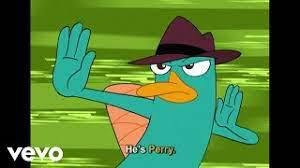

In [17]:
image = load_img(path_gambar)
image

In [25]:
bright = random_brightness(image, max_delta=0.100);

Text(0.5, 1.0, 'gambar sebelum   di augmentasi')

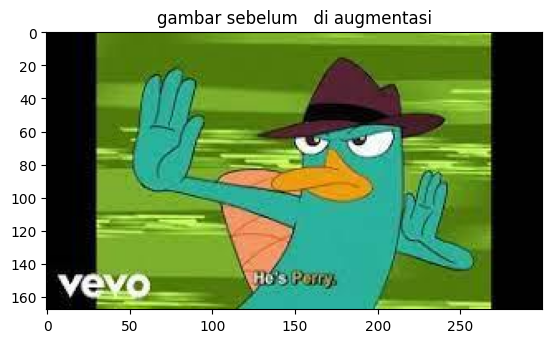

In [26]:
plt.imshow(image)
plt.title('gambar sebelum   di augmentasi')

Text(0.5, 1.0, 'gambar setelah di augmentasi')

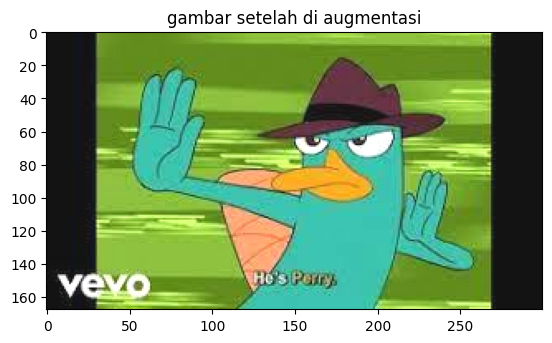

In [27]:
plt.imshow(bright.numpy().astype('uint8'))
plt.title('gambar setelah di augmentasi')

**IMAGEDATAGENERATOR**

In [28]:
train_datagen = ImageDataGenerator(
    rescale = 1/255.0,

    shear_range = 0.1,
    width_shift_range = 0.3,
    height_shift_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    vertical_flip = True,

    validation_split = 0.2
)

val_datagen = ImageDataGenerator(
    rescale = 1/255.0,
    validation_split = 0.2
)

In [29]:
train_dataset = train_datagen.flow_from_directory(
    path,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'training'
)

validation_dataset = val_datagen.flow_from_directory(
    path,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 15 images belonging to 2 classes.
Found 2 images belonging to 2 classes.


In [30]:
train_dataset.class_indices

{'perry the platypus': 0, 'platypus': 1}

In [31]:
model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(2),

    Conv2D(32, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(2),

    Conv2D(32, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(2),

    Flatten(),

    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])

In [32]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 18, 32)        0

Epoch 1/10
1/1 [==============================] - 0s 297ms/step - loss: 0.5715 - accuracy: 0.6000 - val_loss: 0.7206 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 233ms/step - loss: 0.5130 - accuracy: 0.7333 - val_loss: 0.7790 - val_accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 223ms/step - loss: 0.5425 - accuracy: 0.6667 - val_loss: 0.7659 - val_accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 231ms/step - loss: 0.5701 - accuracy: 0.7333 - val_loss: 0.7197 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 229ms/step - loss: 0.5949 - accuracy: 0.7333 - val_loss: 0.7637 - val_accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 217ms/step - loss: 0.5750 - accuracy: 0.7333 - val_loss: 0.7261 - val_accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 229ms/step - loss: 0.5614 - accuracy: 0.7333 - val_loss: 0.7371 - val_accuracy: 0.5000
Epoch 8/10
1/1 [

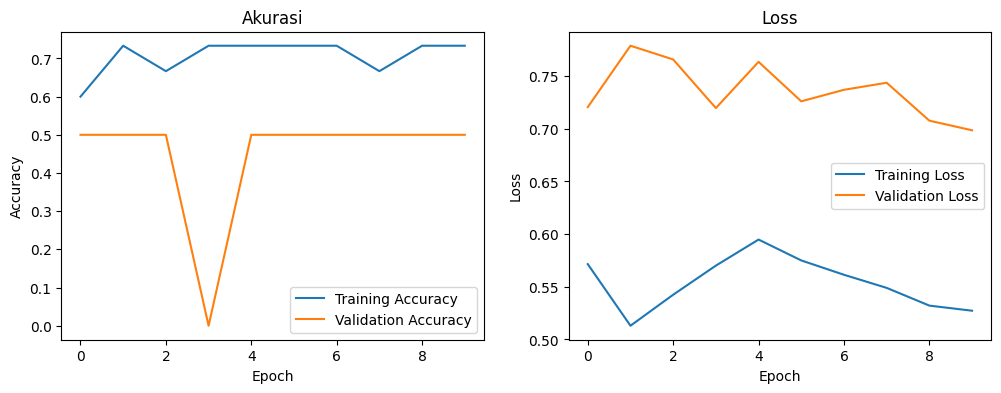

In [49]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Lakukan pelatihan model Anda dengan model.fit() dan perolehan history
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=10, verbose=1)

# Dapatkan data metrik dari history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot akurasi
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Akurasi')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

In [50]:
model.evaluate(validation_dataset)

1/1 [==============================] - 0s 67ms/step - loss: 0.6986 - accuracy: 0.5000


[0.6986488103866577, 0.5]

1/1 [==============================] - 0s 18ms/step


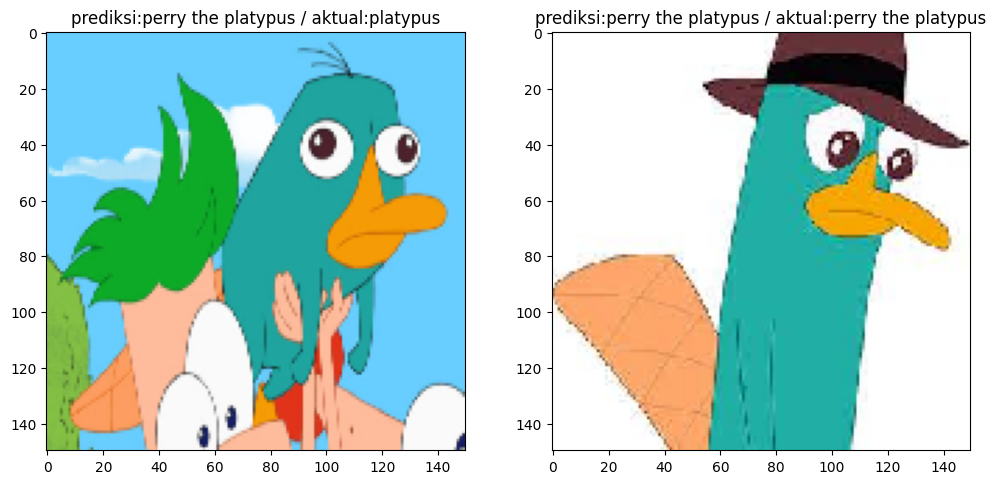

In [51]:
# Ambil elemen pertama dari validation dataset
test_x, test_y = validation_dataset[0]

# Buat label
label = train_dataset.class_indices
label = dict((v, k) for k, v in label.items())

# Prediksi menggunakan model
preds = model.predict(test_x)

# Tampilkan gambar
plt.figure(figsize=(25, 25))
for i in range(len(test_x)):
    plt.subplot(4, 4, i+1)
    predicted_label = label[np.argmax(preds[i])]
    actual_label = label[np.argmax(test_y[i])]
    plt.title('prediksi:%s / aktual:%s' % (predicted_label, actual_label))
    plt.imshow(test_x[i])

plt.show()
